In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.shape

(768, 9)

In [14]:
data[data['Outcome'] == 0].count()

Pregnancies                 500
Glucose                     500
BloodPressure               500
SkinThickness               500
Insulin                     500
BMI                         500
DiabetesPedigreeFunction    500
Age                         500
Outcome                     500
dtype: int64

In [27]:
print(data[data['BloodPressure'] == 0].shape[0])
print(data[data['BloodPressure'] == 0].index)
print(data[data['BloodPressure'] == 0].groupby('Outcome')['Age'].count())

35
Int64Index([  7,  15,  49,  60,  78,  81, 172, 193, 222, 261, 266, 269, 300,
            332, 336, 347, 357, 426, 430, 435, 453, 468, 484, 494, 522, 533,
            535, 589, 601, 604, 619, 643, 697, 703, 706],
           dtype='int64')
Outcome
0    19
1    16
Name: Age, dtype: int64


In [29]:
print(data[data['Glucose'] == 0].shape[0])
print(data[data['Glucose'] == 0].index)
print(data[data['Glucose'] == 0].groupby('Outcome')['Age'].count())

5
Int64Index([75, 182, 342, 349, 502], dtype='int64')
Outcome
0    3
1    2
Name: Age, dtype: int64


In [31]:
print(data[data.BMI == 0].shape[0])
print(data[data.BMI == 0].index)
print(data[data.BMI == 0].groupby('Outcome')['Age'].count())

11
Int64Index([9, 49, 60, 81, 145, 371, 426, 494, 522, 684, 706], dtype='int64')
Outcome
0    9
1    2
Name: Age, dtype: int64


In [32]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [34]:
print(data[data.Insulin == 0].shape[0])
print(data[data.Insulin == 0].index)
print(data[data.Insulin == 0].groupby('Outcome')['Age'].count())

374
Int64Index([  0,   1,   2,   5,   7,   9,  10,  11,  12,  15,
            ...
            754, 756, 757, 758, 759, 761, 762, 764, 766, 767],
           dtype='int64', length=374)
Outcome
0    236
1    138
Name: Age, dtype: int64


In [37]:
print(data[data.SkinThickness == 0].shape[0])
print(data[data.SkinThickness == 0].index)
print(data[data.SkinThickness == 0].groupby('Outcome')['Age'].count())

227
Int64Index([  2,   5,   7,   9,  10,  11,  12,  15,  17,  21,
            ...
            734, 739, 743, 749, 750, 757, 758, 759, 762, 766],
           dtype='int64', length=227)
Outcome
0    139
1     88
Name: Age, dtype: int64


In [38]:
# As we can see we can't drop insulin and Skin Thickness as we will be left with very few data

In [40]:
df=data[(data['BloodPressure'] != 0) & (data["Glucose"] != 0) & (data["BMI"] != 0)]

In [41]:
df.shape

(724, 9)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c1d67a5e48>,
 'caps': [<matplotlib.lines.Line2D at 0x1c1d7a567f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c1d67a5d30>],
 'medians': [<matplotlib.lines.Line2D at 0x1c1d7a56e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c1d7a56f60>],
 'means': []}

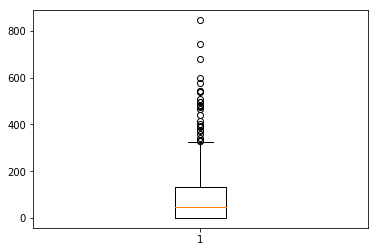

In [42]:
#plt.boxplot(df["Insulin"])

In [43]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [44]:
model=[LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]

In [46]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=47)

In [52]:
 for mod in model:
        score=cross_val_score(mod,x,y,cv=5)
        print(mod)
        print('\nScore\n',score)
        print('\nMean\n',score.mean())
        print('\nStandar Deviation\n',score.std())
        print("\n Variance\n",score.var())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Score
 [0.74482759 0.76551724 0.75172414 0.7862069  0.78472222]

Mean
 0.7665996168582376

Standar Deviation
 0.016788966441275144

 Variance
 0.00028186939416626296
GaussianNB(priors=None, var_smoothing=1e-09)

Score
 [0.75862069 0.73793103 0.74482759 0.7862069  0.75      ]

Mean
 0.7555172413793103

Standar Deviation
 0.016765856249852704

 Variance
 0.000281093935790725
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Score
 [

3.312121078668855e-06